<a href="https://colab.research.google.com/github/Karlajack/Machine_Learning_24e/blob/main/Wk3-Credit_Risk_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Risk modelling Classification Project**

# Importing necessary Libraries and Data

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline
import random

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.svm import LinearSVR,SVR,NuSVR,SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing data
Credit = pd.read_csv("/content/raw-data.csv")
Credit.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
#Renaming columns in the dataset with their correct names
Credit_new = Credit.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Credit_new.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


#EDA and Data Cleaning

In [ ]:
Credit_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [ ]:
Credit_new.shape

(119528, 32)

# Exploring Missingness

In [ ]:
#Missingness
Missing_Total=Credit_new.isnull().sum().sort_values(ascending=False)

Missing_Total

Time since last Personal loan taken (in months)                   106097
Total sanctioned amount in the unsecured Loans which are Live     100500
Total sanctioned amount in the secured Loans which are Live       100247
Time since first consumer durables loan taken (in months)          99095
Max amount sanctioned in the Live loans                            82902
Resident type of customer                                          35397
No of advance EMI paid                                             34480
Date of birth                                                      34480
Employment type                                                    34480
Rate of interest                                                   34480
Customer age when loanwas taken                                    34480
Product code of Two wheeler                                        34480
Dealer codes from where customer has purchased the Two wheeler     34480
Tenure                                             

Text(0.5, 1.0, 'missingness values')

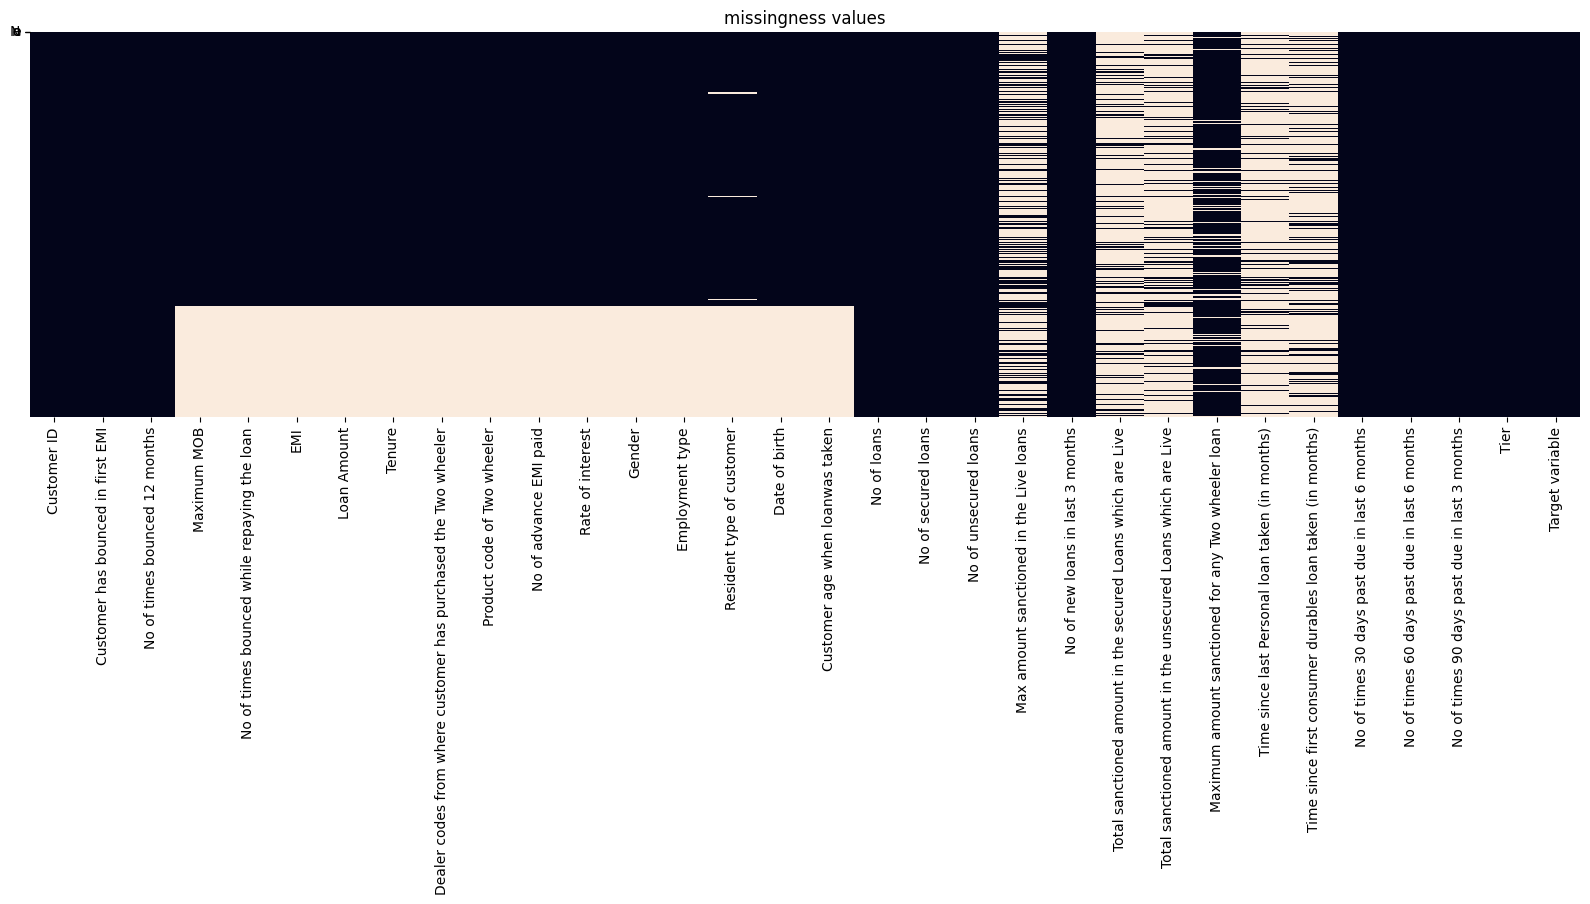

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(Credit_new.isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

In [ ]:
Total_Records=Credit_new.isnull().count().sort_values(ascending=False)
Total_Records


Customer ID                                                       119528
Customer has bounced in first EMI                                 119528
Tier                                                              119528
No of times 90 days past due in last 3 months                     119528
No of times 60 days past due in last 6 months                     119528
No of times 30 days past due in last 6 months                     119528
Time since first consumer durables loan taken (in months)         119528
Time since last Personal loan taken (in months)                   119528
Maximum amount sanctioned for any Two wheeler loan                119528
Total sanctioned amount in the unsecured Loans which are Live     119528
Total sanctioned amount in the secured Loans which are Live       119528
No of new loans in last 3 months                                  119528
Max amount sanctioned in the Live loans                           119528
No of unsecured loans                              

In [ ]:
percent_missingness=Missing_Total/Total_Records*100

missing_credit=pd.concat([Missing_Total,percent_missingness],axis=1,keys=['Missing_Total','percent_missingness'],sort=False)

missing_credit.index.name='variable'

missing_credit=missing_credit[missing_credit['Missing_Total']>0]
missing_credit.head(10)


,Missing_Total,percent_missingness
variable,,
Time since last Personal loan taken (in months),106097,88.763302
Total sanctioned amount in the unsecured Loans which are Live,100500,84.080717
Total sanctioned amount in the secured Loans which are Live,100247,83.869052
Time since first consumer durables loan taken (in months),99095,82.905261
Max amount sanctioned in the Live loans,82902,69.357807
Resident type of customer,35397,29.613982
No of advance EMI paid,34480,28.846797
Date of birth,34480,28.846797
Employment type,34480,28.846797


In [ ]:
#Removing  columns with percentage missingness of over 60%

Credit_new.drop(['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)','Total sanctioned amount in the unsecured Loans which are Live','Total sanctioned amount in the secured Loans which are Live','Time since first consumer durables loan taken (in months)','Max amount sanctioned in the Live loans','Maximum amount sanctioned for any Two wheeler loan'], axis = 1, inplace = True)
Credit_new.shape

(119528, 26)

**# Data Cleaning**

In [ ]:
data=Credit_new.copy()

**Imputing missing values**

In [ ]:
CatVar = data.select_dtypes(include=['object'])
NumVar = data.select_dtypes(include=['float64','int64'])






In [ ]:
#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVar=CatVar.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVar=NumVar.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:

num_cols = data[NumVar]
categorical_cols= data[CatVar]

#For Numerical columns impute with median

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num = imp_median.fit_transform(num_cols)




#For Categorical columns impute with mode
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
cat = imp_mode.fit_transform(categorical_cols )


In [ ]:
data[CatVar]=cat
data[NumVar]=num

**Encoding**

In [ ]:
#categorical columns
# Label Encoding for object to numeric conversion

le = LabelEncoder()

for feature in CatVar:
    data[feature] = le.fit_transform(data[feature].astype(str))

In [ ]:
data.head()

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,customer_age_when_loanwas_taken,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1.0,0.0,0.0,24.0,0.0,2432.0,46500.0,24.0,1385.0,3,...,40.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,2.0,0.0,1.0,24.0,1.0,1495.0,28168.0,24.0,2496.0,1,...,47.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,3.0,0.0,0.0,26.0,0.0,1707.0,38900.0,30.0,1346.0,3,...,31.0,9.0,6.0,3.0,0.0,31.0,31.0,16.0,0,0.0
3,4.0,0.0,0.0,24.0,0.0,2128.0,42900.0,24.0,1375.0,3,...,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,5.0,0.0,0.0,27.0,0.0,1824.0,40900.0,30.0,4140.0,0,...,30.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0


# linear separabillity of the two classes-- Bivariate analysis using scatter plots

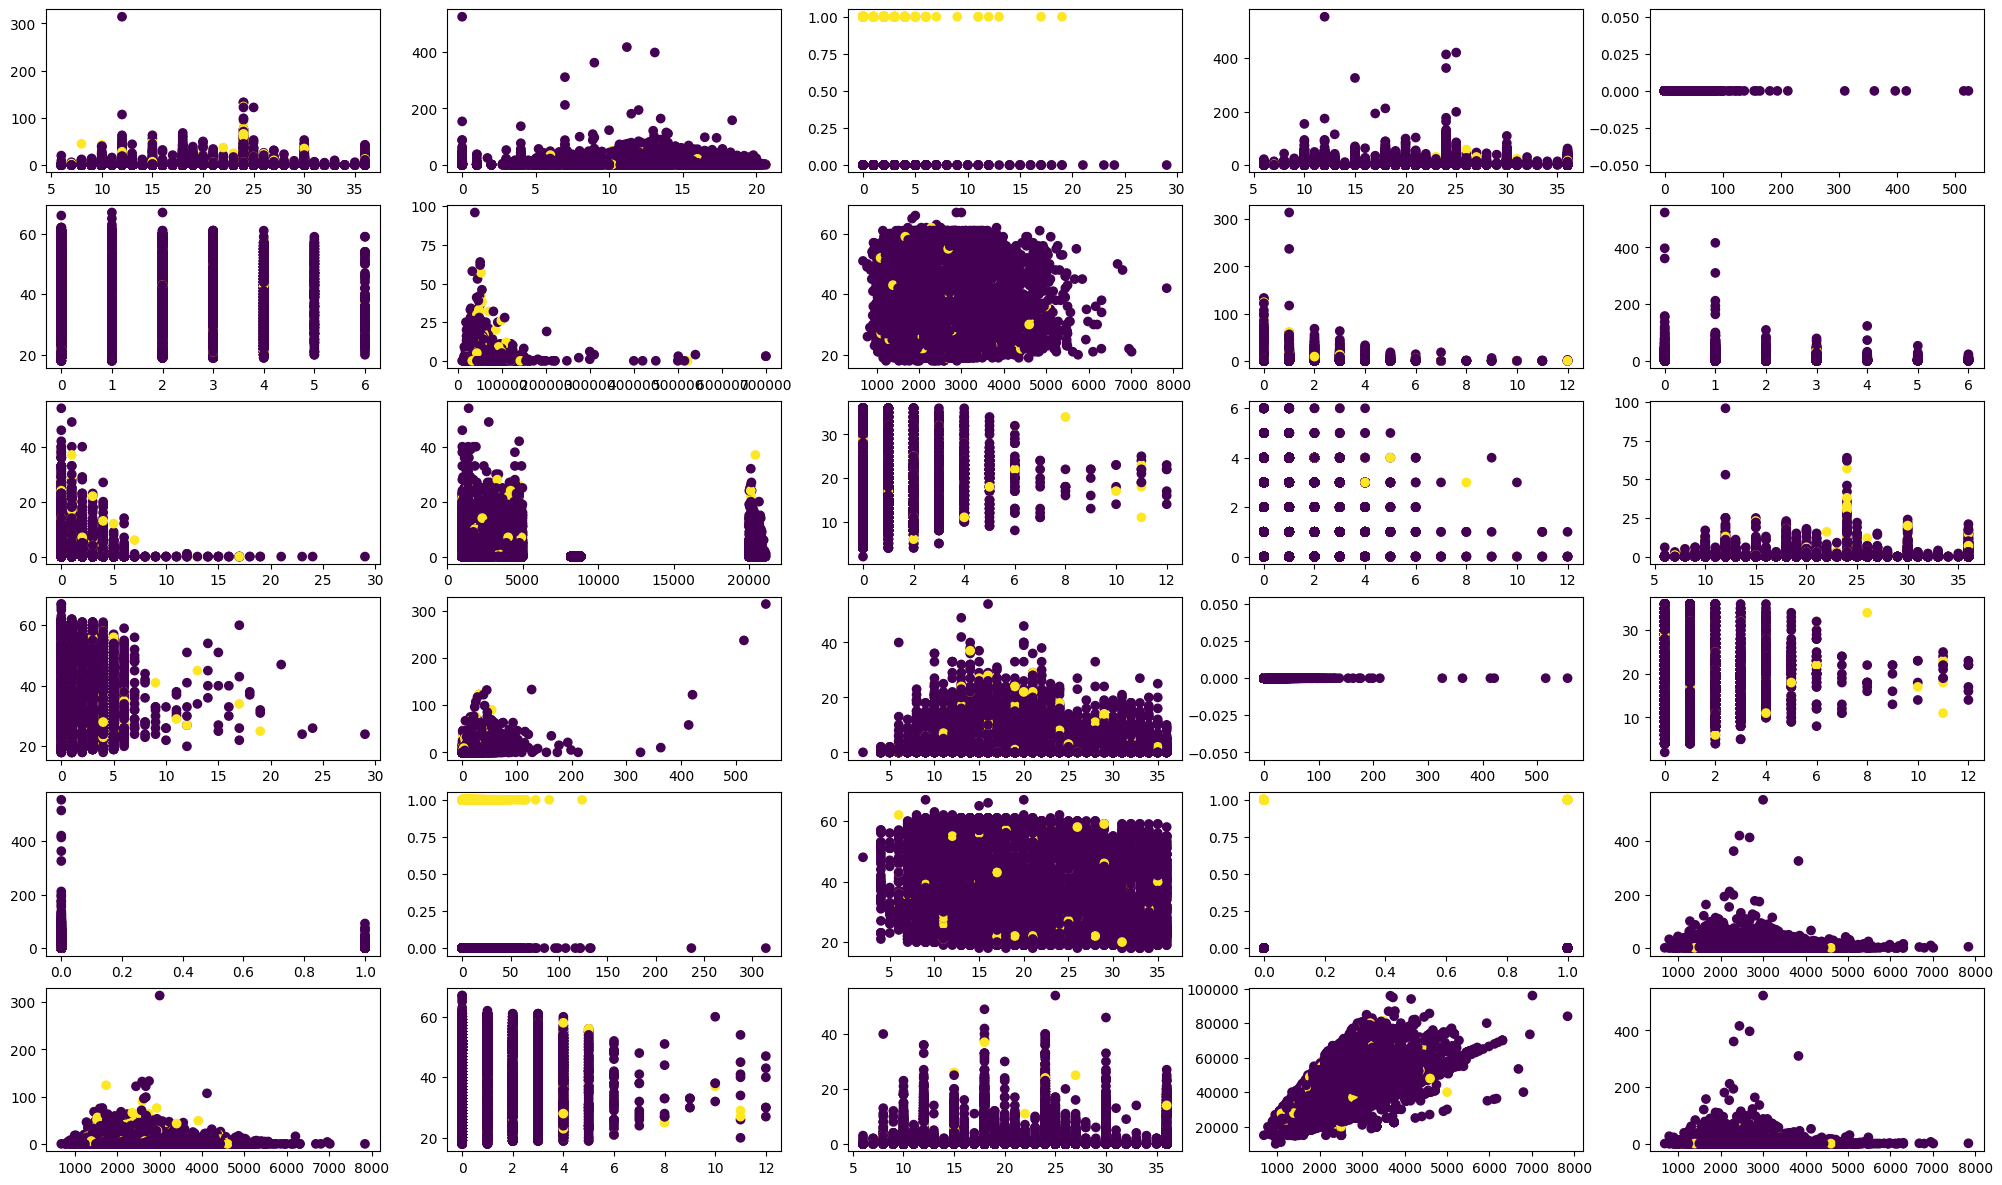

In [ ]:
comb = list(itertools.combinations([a for a in range(1, len(NumVar.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=30) #Randomly choose 30 bivariate relationships to visualise. Total bivariate relationships (4060 = 30C3) is too much
fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(NumVar[NumVar.columns[rand[i][0]]],NumVar[NumVar.columns[rand[i][1]]],c=NumVar['Target variable'],cmap='viridis')

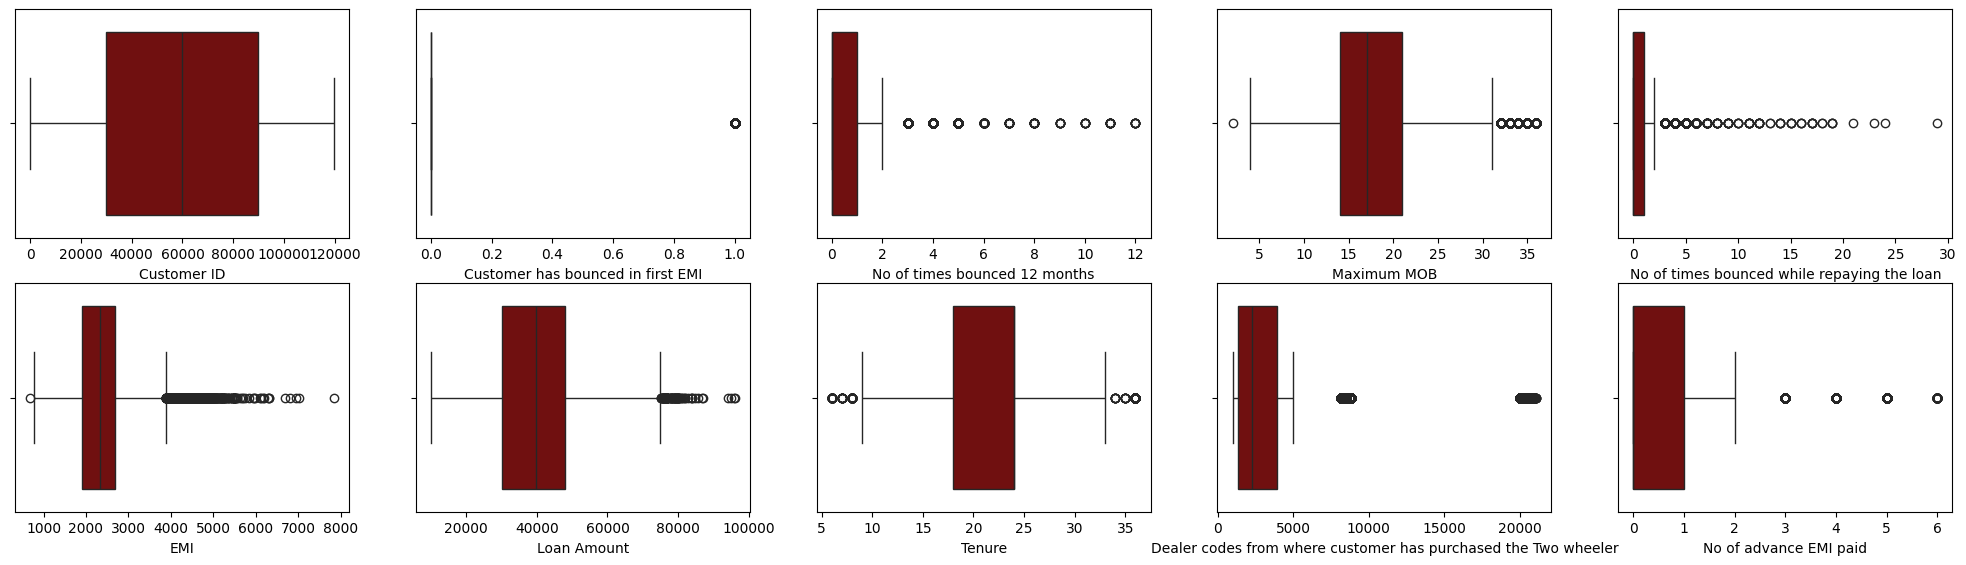

In [ ]:
#univariate analysis for numerical features to check outliers
fig=plt.figure(figsize=(25,35))
for i,j in zip(NumVar,range(10)):
  ax=fig.add_subplot(10,5,j+1)
  sns.boxplot(data=NumVar,x=NumVar[i],orient='v',color='Maroon')



Insights Most features are not linearly separable for classification problem

Support vector machines and ensemble methods would be best models for this data



Effect of multicolleaniarity in model performance Multicollinearity is a phenomenon where one or more independent variables are highly correlated with other independent variables in a regression model

Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model

It increase Co-efficient sensitivity.mall changes to the model could cause major changes to the coefficient estimates

In [ ]:
corr_df=data[num_cols].corr()
corr_df.head(2)



In [ ]:
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(corr_df,annot=True,cmap='viridis')

**Class IMbalance**


In [ ]:
x=data.drop(['customer_id','target_variable'],axis=1)
y=data[["target_variable"]]

In [ ]:
smote_sample=SMOTE(random_state=130,sampling_strategy='auto')
x_res, y_res=smote_sample.fit_resample(x,y)

In [ ]:
print(x_res.shape,y_res.shape)

(233828, 24) (233828, 1)


**# Modelling**

# Modelling

In [ ]:
x=x_res
y=y_res

In [ ]:
# Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(163679, 24) (70149, 24) (163679, 1) (70149, 1)


In [ ]:
#Logistic regression
pipe=make_pipeline(PolynomialFeatures(degree=2),MinMaxScaler(),LogisticRegression(penalty='l2',solver='lbfgs',C=100))
scores=cross_val_score(pipe,x_train,y_train,cv=5,scoring="accuracy")

print(scores,scores.mean())

[0.80394673 0.80480205 0.80694037 0.79689027 0.8055598 ] 0.8036278443291691


In [ ]:
#support vector machine classification
pipe=make_pipeline(PolynomialFeatures(degree=3),MinMaxScaler(),SVC(kernel='rbf',C=25))
scores=cross_val_score(pipe,x_train,y_train,cv=5,scoring="accuracy")

print(scores,scores.mean())